# Projeto 1 - T320 (1S2023)

### Instruções

1. Quando você terminar os exercícios do projeto, vá até o menu do Jupyter ou Colab e selecione a opção para fazer o download do notebook.
    * Os notebooks têm extensão .ipynb. 
    * Este deve ser o arquivo que você irá entregar.
    * No Jupyter vá até a opção **File** -> **Download as** -> **Notebook (.ipynb)**.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
2. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este projeto e faça o upload do seu notebook. Veja que há uma opção para anexar arquivos à tarefa.
3. Atente-se ao prazo de entrega definido na tarefa do MS Teams. Entregas fora do prazo não serão aceitas.
4. **O projeto pode ser resolvido em grupos de no MÁXIMO 3 alunos**.
5. Todas as questões têm o mesmo peso.
6. Não se esqueça de colocar seu(s) nome(s) e número(s) de matrícula no campo abaixo. Substitua os nomes que já estão no campo abaixo.
7. Você pode consultar todo o material de aula.
8. A interpretação faz parte do projeto. Leia o enunciado de cada questão atentamente!
9. Boa sorte!

**Nomes e matrículas**:

1. Nome do primeiro aluno - Matrícula do primeiro aluno
2. Nome do segundo aluno - Matrícula do segundo aluno
3. Nome do terceiro aluno - Matrícula do terceiro aluno

### 1) Neste exercício, você irá utilizar validação cruzada para encontrar a melhor função discriminante para se separar duas classes.

1. Execute a célula abaixo e analise a figura gerada. A figura mostra os exemplos de duas classes.

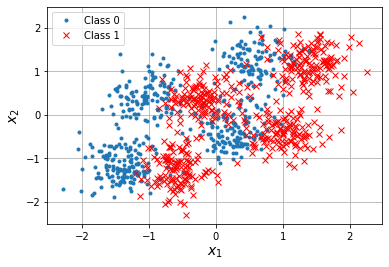

Dimensões de X: (1000, 2)
Dimensão de y: (1000,)


In [1]:
# Import all the necessary libraries.
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
import urllib

# Reset PN sequence generator.
seed = 42
np.random.seed(seed)

# Retrieve the dataset from dropbox.
urllib.request.urlretrieve('https://www.dropbox.com/s/fvoa3rzpusdkgms/dados_treinamento.mat?dl=1', 'dados_treinamento.mat')

# Load dataset.
mat = scipy.io.loadmat('dados_treinamento.mat')

# Split dataset into attributes and labels.
X = mat['X']
y = mat['y'].reshape(1000,)

# Plot the classes.
idx0 = np.argwhere(y==-1)
idx1 = np.argwhere(y==1)
plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

# Print dimensions.
print('Dimensões de X:', X.shape)
print('Dimensão de y:', y.shape)

2. Observe a figura acima e responda: uma função discriminante com formato de reta separaria bem estas duas classes, ou seja, obteria uma alta acurácia? (**Justifique a resposta**).

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

3. Vamos verificar se uma reta é um bom formato para a função discriminante. Neste item, você deve instanciar um pipeline de ações, treinar um regressor logístico com função discriminante com formato de reta para classificar as amostras das duas classes e, na sequência, imprimir a acurácia obtida pelo classificador com o conjunto total de amostras.

**DICAS**

+ Crie um `pipeline` (use um objeto da classe `Pipeline`) que executa as seguintes ações: padronização (use um objeto da classe `StandardScaler`) e, na sequência, regressão logística (use um objeto da classe `LogisticRegression`).
+ Lembre-se que por padrão o parâmetro `fit_intercept` da classe `LogisticRegression` é igual a `True`, ou seja, a classe encontra por padrão o valor do peso de bias $a_0$. Portanto você não precisa configurar este parâmetro.
+ Use a semente definida no item 1 para configurar a semente do objeto da classe `LogisticRegression`.
+ A função discriminante aqui deve ter o formato de uma reta: $g(\textbf{x}) = \hat{a}_0 + \hat{a}_1 x_1 + \hat{a}_2 x_2$.
+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_with_cross_validation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_with_cross_validation.ipynb).

In [2]:
# Digite aqui o código do exercício.

4. Usando o modelo treinado no item anterior, plote suas regiões de decisão.

**DICAS**

+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_with_cross_validation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_with_cross_validation.ipynb).

In [3]:
# Digite aqui o código do exercício.

5. Plote a matriz de confusão deste classificador para todos os exemplos.

**DICAS**:

+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_with_cross_validation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_with_cross_validation.ipynb).

In [4]:
# Digite aqui o código do exercício.

6. Após ter analisado os resultados dos itens anteriores, responda:

+ Qual tipo de função discriminante, **linear** ou **não-linear**, é necessária para se separar as duas classes e, consequentemente, ter-se uma maior acurácia?

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

7. Neste item, você irá utilizar validação cruzada do tipo k-Fold para encontrar a ordem ideal para que um polinômio separe as duas classes da melhor forma possível (i.e., com maior acurácia possível). Ao final, plote os resultados obtidos (ou seja, a média e o desvio padrão da acurácia) para que você possa decidir qual é a melhor ordem.

**DICAS**:

+ Configure o parâmetro `n_splits`, ou seja, o número de folds, $k$, da classe `KFold` como 10.
+ Realize a validação cruzada para polinômios de ordem 1 até 12, inclusive, em passos de 1 unidade.
+ Utilize todas as amostras carregadas no item 1 deste exercício.
+ Configure o parâmetro `scoring` da função `cross_val_score` como `accuracy`.
+ Use a semente definida no item 1 para configurar a semente dos objetos das classes `LogisticRegression` e `KFold`.
+ A validação cruzada pode demorar um pouco, portanto, tenha paciência.
+ Escolha a ordem que resultar na maior acurácia média.
+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_with_cross_validation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_with_cross_validation.ipynb).

In [5]:
# Digite o código do exercício aqui.

8. Usando a ordem que resultou na maior acurácia média, instancie um pipeline de ações, treine um regressor logístico que use o polinômio com a ordem escolhida e, na sequência, imprima a acurácia obtida pelo classificador com o conjunto total de amostras.

**DICAS**

+ Crie um `pipeline` (use um objeto da classe `Pipeline`) que executa as seguintes ações: criação do polinômio com a ordem escolhida, (use um objeto da classe `PolynomialFeatures`), padronização (use um objeto da classe `StandardScaler`) e, na sequência, regressão logística (use um objeto da classe `LogisticRegression`).
+ Para encontrar na lista de valores de acurácia o índice que resultou no maior valor, use a função `argmax()` da biblioteca NumPy.
+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_with_cross_validation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_with_cross_validation.ipynb).

In [6]:
# Digite o código do exercício aqui.

9. Usando o modelo treinado no item anterior, plote suas regiões de decisão.

**DICAS**

+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_with_cross_validation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_with_cross_validation.ipynb).

In [7]:
# Digite o código do exercício aqui.

10. Plote a matriz de confusão deste classificador para todos os exemplos.

**DICAS**:

+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_with_cross_validation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_with_cross_validation.ipynb).

In [8]:
# Digite o código do exercício aqui.

11. Após analisar os resultados dos itens anteriores, responda:

+ Dada a disposição atual das amostras do conjunto de treinamento, seria possível encontrarmos um classificador que atingisse 100% de acurácia?

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

12. Calcule manualmente as seguintes métricas para o melhor clasificador:

+ Acurácia
+ Precisão
+ Sensibilidade (ou recall)
+ Pontuação-F para $m = 1$, ou seja, $F_1$

**DICAS**
+ Para calcular as métricas, se baseie nos valores retornados pela matriz de confusão do item 10.
+ A acurácia pode ser calculada somando-se todos os exemplos corretamente classificados para cada uma das 2 classes e dividindo-se pelo número total de exemplos do conjunto de validação.

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

13. Compare os valores calculados manualmente com os calculados pela função `classification_report` da biblioteca SciKit-Learn.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_with_cross_validation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_with_cross_validation.ipynb).

In [10]:
# Digite aqui o código do exercício.

### 2) Classificação multi-classes

Neste exercício, vamos considerar o problema de classificar exemplos de veículos tendo como base alguns atributos extraídos de imagens de suas silhuetas. 

Inicialmente, o conjunto de dados será divido em duas partes, uma para treinamento, outra reservada para validação. Dois métodos de classificação serão explorados neste exercício: regressão logística com abordagem um-contra-o-resto e regressão softmax para lidar com este cenário de classificação multi-classe.

Em particular, usaremos os dados disponíveis na base Vehicle Silhouettes, que pode ser acessada através do link: https://archive.ics.uci.edu/ml/datasets/Statlog+(Vehicle+Silhouettes)

A base de dados possui 846 exemplos, onde cada exemplo (veículo) é descrito por 18 atributos numéricos (mostrados na tabela abaixo) e existem quatro classes possíveis: VAN, SAAB, BUS e OPEL.

|             Atributo             |                       Descrição                       |
|:--------------------------------:|:-----------------------------------------------------:|
|           COMPACTNESS            |                (average perim)**2/area                |
|           CIRCULARITY            |                (average radius)**2/area               |
|       DISTANCE CIRCULARITY       |           area/(av.distance from border)**2           |
|           RADIUS RATIO           |              (max.rad-min.rad)/av.radius              |
|       PR.AXIS ASPECT RATIO       |               (minor axis)/(major axis)               |
|     MAX.LENGTH ASPECT RATIO      |         (length perp. max length)/(max length)        |
|          SCATTER RATIO           | (inertia about minor axis)/(inertia about major axis) |
|          ELONGATEDNESS           |                 area/(shrink width)**2                |
|      PR.AXIS RECTANGULARITY      |          area/(pr.axis length*pr.axis width)          |
|    MAX.LENGTH RECTANGULARITY     |         area/(max.length*length perp. to this)        |
| SCALED VARIANCE ALONG MAJOR AXIS |        (2nd order moment about minor axis)/area       |
| SCALED VARIANCE ALONG MINOR AXIS |        (2nd order moment about major axis)/area       |
|    SCALED RADIUS OF GYRATION     |                   (mavar+mivar)/area                  |
|     SKEWNESS ABOUT MAJOR AXIS    |    (3rd order moment about major axis)/sigma_min**3   |
|     SKEWNESS ABOUT MINOR AXIS    |    (3rd order moment about minor axis)/sigma_maj**3   |
|     KURTOSIS ABOUT MINOR AXIS    |    (4th order moment about major axis)/sigma_min**4   |
|     KURTOSIS ABOUT MAJOR AXIS    |    (4th order moment about minor axis)/sigma_maj**4   |
|          HOLLOWS RATIO           |      (area of hollows)/(area of bounding polygon)     |

A figura abaixo mostra exemplos das quatro classes possíveis.

<img src="../figures/carros_dataset.PNG" width="500px">

1. Execute a célula de código abaixo para gerar os conjuntos de treinamento e validação.

**DICAS**
+ Perceba que os dados já são separados em conjuntos de trainamento e validação. Com 80% para treinamento e 20% para validação.

In [2]:
# Import all the necessary libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, f1_score
from sklearn.metrics import classification_report, precision_score, recall_score

# Reset PN sequence generator.
seed = 42
np.random.seed(seed)

# Define the number of classes.
numberOfClasses = 4

# Load the dataset.
df = pd.read_csv('https://www.dropbox.com/s/pe0v72fhd14ivao/dataset_vehicle.csv?dl=1')

# Convert the labels from strings into integer numbers.
c = {"van":0, "saab":1, "bus":2, "opel":3}
df.Class = [c[item] for item in df.Class]

# Convert dataset into numpy array.
data = df.to_numpy()

# Create attribute matrix and label vector.
X = data[:,0:18]
y = data[:,18]

# Split the data into training and validation datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Show the first five examples of the dataset.
df.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,0
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,0
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,1
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,0
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,2


2. Neste item, você irá classificar a base de dados com o regressor logístico utilizando a abordagem um-contra-o-resto (one-versus-rest - ovr). Instancie um objeto da classe `LogisticRegression` da biblioteca Scikit-Learn que opere com a abordagem `ovr`, treine o modelo, calcule e imprima sua acurácia para o conjunto de validação.

**DICAS**

+ Para configurar a abordagem **um-contra-o-resto**, durante o instanciamento da classe `LogisticRegression`, configure o parâmetro `multi_class` com a string `ovr`, ou seja
```python 
multi_class='ovr'
```
+ Para que não ocorram problemas de convergência, configure o parâmetro `max_iter` com a valor `10000`, ou seja
```python 
max_iter=10000
```
+ Para podermos comparar os modelos da mesma forma, configure o parâmetro `random_state` com a semente definida no item 1, ou seja,
```python 
random_state=seed
```

In [2]:
# Digite aqui o código do exercício.

3. Plote a matriz de confusão para o conjunto de validação.

In [1]:
# Digite aqui o código do exercício.

4. Analise a matriz de confusão e a figura com exemplos das quatro classes. O que você consegue concluir a respeito das **confusões** feitas pelo classificador?

**DICAS**
+ Foque em classes similares e vejas as confusões feitas entre essas classes.

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

5. Neste item, você irá classificar a base de dados com o regressor softmax. Instancie um objeto da classe `LogisticRegression` da biblioteca Scikit-Learn que opere como regressor softmax, treine o modelo, calcule e imprima sua acurácia para o conjunto de validação.

**DICAS**

+ Para configurar o regressor softmax, durante o instanciamento da classe `LogisticRegression`, configure o parâmetro `multi_class` com a string `multinomial`, ou seja
```python 
multi_class='multinomial'
```
+ Para que não ocorram problemas de convergência, configure o parâmetro `max_iter` com a valor `10000`, ou seja
```python 
max_iter=10000
```
+ Para podermos comparar os modelos da mesma forma, configure o parâmetro `random_state` com a semente definida no item 1, ou seja,
```python 
random_state=seed
```

In [3]:
# Digite aqui o código do exercício.

6. Plote a matriz de confusão para o conjunto de validação.

In [4]:
# Digite aqui o código do exercício.

7. Qual dos dois classificadores apresenta o melhor desempenho?

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

8. Se nós analisarmos as classes, percebemos que as classes SAAB e OPEL poderiam ser agrupadas em um única classe chamada de CAR, pois ambos são carros e, em uma aplicação genérica, talvez não faça sentido classificar estes dois tipos de carros de forma independente. Assim, neste item, agrupamos as duas classes em um única classe que será chamada de CAR.

Execute a célula de código abaixo para agrupar as duas classes. Após a execução, a classe VAN será representada pelo número inteiro 0, a classe CAR (SAAB+OPEL) representada pelo número 1 e a classe BUS representada pelo número 2.

In [6]:
# Change positions where the label is equal to 3 to 1, the number that will define the class CAR
y_train = np.where(y_train==3, 1, y_train)

# Change positions where the label is equal to 3 to 1, the number that will define the class CAR
y_test = np.where(y_test==3, 1, y_test)

9. Refaça a classificação com a nova base de dados utilizando o regressor softmax. Instancie um objeto da classe `LogisticRegression` da biblioteca Scikit-Learn que opere como regressor softmax, treine o modelo, calcule e imprima sua acurácia para o conjunto de validação.

**DICAS**

+ Para configurar o regressor softmax, durante o instanciamento da classe `LogisticRegression`, configure o parâmetro `multi_class` com a string `multinomial`, ou seja
```python 
multi_class='multinomial'
```
+ Para que não ocorram problemas de convergência, configure o parâmetro `max_iter` com a valor `10000`, ou seja
```python 
max_iter=10000
```
+ Para podermos comparar os modelos da mesma forma, configure o parâmetro `random_state` com a semente definida no item 1, ou seja,
```python 
random_state=seed
```

In [5]:
# Digite aqui o código do exercício.

10. Plote a matriz de confusão para o conjunto de validação.

**DICAS**
+ Lembre-se que agora temos apenas 3 classes: VAN (0), CAR (1) e BUS (2).

In [6]:
# Digite aqui o código do exercício.

11. Compare os resultados de acurácia e da matriz de confusão obtidos com uma base de dados com três classes com os mesmos resultados obtidos quando tínhamos quatro classes. O que pode ser concluído?

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

### 3) Neste exercício, você utilizará um classificador para detectar símbolos de uma modulação digital, a modulação 16QAM.

1. Execute a célula abaixo e analise o resultado. A figura mostra símbolos ruidosos da modulação 16QAM, onde cada um dos dezesseis possíveis símbolos é considerado como uma classe diferente.

**DICAS**

+ Notem que na célula de código abaixo, o conjunto de dados já está dividido em conjuntos de treinamento e validação.

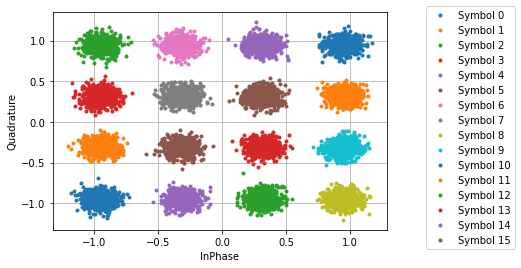

In [1]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import seaborn as sns
from scipy.special import erfc

# Reset PN sequence random generator.
seed = 42
np.random.seed(seed)

# Mapping table.
mapping_table = [-3-3j, -3-1j, -3+3j, -3+1j, -1-3j, -1-1j, -1+3j, -1+1j, 3-3j, 3-1j, 3+3j, 3+1j, 1-3j, 1-1j, 1+3j, 1+1j]

# Modulate bits into 16QAM symbols.
def mod(bits):
    symbols = np.zeros((len(bits), 1), dtype=complex)
    for i in range(0, len(bits)): 
        symbols[i, 0] = mapping_table[bits[i]]/np.sqrt(10.0)
    return symbols

# Number of symbols to be transmitted.
N = 10000

# Number of classes.
numOfClasses = 16

# Create Es/N0 vector.
EsN0dB = 20
EsN0Lin = 10.0**(-(EsN0dB/10.0))
    
# Generate bits.
bits_16qam = np.random.randint(0, numOfClasses, N)
# Modulate the binary stream into 16QAM symbols.
symbols = mod(bits_16qam)
    
# Generate noise vector. 
# Divide by two since the theoretical ber uses a complex Normal pdf with variance of each part = 1/2.
noise = np.sqrt(EsN0Lin/2.0)*(np.random.randn(N, 1) + 1j*np.random.randn(N, 1))

# Pass 16QAM symbols through AWGN channel.
y = symbols + noise
    
# Create the attribute matrix.
X = np.c_[np.real(y), np.imag(y)]

# Split array into random train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, bits_16qam, test_size=0.3, random_state=seed)
    
# Plot the classes.
for i in range(numOfClasses):
    idx = np.argwhere(bits_16qam == i)
    label = 'Symbol '+str(i)
    plt.plot(np.real(y[idx.ravel()]), np.imag(y[idx.ravel()]), '.', label=label)
plt.grid()
plt.xlabel('InPhase')
plt.ylabel('Quadrature')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

2. Normalmente, treina-se um modelo com uma relação sinal-ruído alta, como a usada para gerar os símbolos no item anterior. Portanto, neste exercício, treine um **regressor softmax** com o conjunto de treinamento gerado no item anterior e calcule sua acurácia com o conjunto de validação.

**DICAS**

+ Para configurar o regressor softmax, durante o instanciamento da classe `LogisticRegression`, configure o parâmetro `multi_class` com a string `multinomial`, ou seja
```python 
multi_class='multinomial'
```
+ Configure o parâmetro `random_state` da classe `LogisticRegression` com a semente definida no item 1, ou seja,
```python 
random_state=seed
``` 
+ Seu classificador deve apresentar uma acurácia de 100%.
+ Para que os próximos itens deste exercício funcionem corretamente, chame seu modelo de `model`.

In [7]:
# Digite aqui o código do exercício.

3. Usando o modelo treinado no item anterior, plote as regiões de decisão deste classificador.

In [8]:
# Digite aqui o código do exercício.

4. Plote a matriz de confusão deste classificador para os exemplos do conjunto de validação.

In [9]:
# Digite aqui o código do exercício.

5. Neste ítem, você irá comparar a taxa de erro de símbolo obtida pelo classificador treinado com a taxa de erro de símbolo teórica da modulação 16QAM. Portanto, execute a célula de código abaixo e analise o resultado obtido.

**DICAS**

+ Para que o código abaixo funcione corretamente, o nome do seu classificador treinado em um dos itens anteriores deve ser `model` .
+ Esta simulação irá demorar, portanto, pegue um café e tenha paciência.

In [10]:
# Number of symbols to be transmitted.
N = 10000000

# Create Es/N0 vector.
EsN0dB = np.arange(0, 22, 2)

# Iterate over all EsN0 values and calculate SER.
ser_simu = np.zeros((len(EsN0dB),))
ser_theo = np.zeros((len(EsN0dB),))
for idx in range(len(EsN0dB)):
    EsN0Lin = 10.0**(-(EsN0dB[idx]/10.0))

    # Generate 16QAM symbols.
    bits_16qam = np.random.randint(0, numOfClasses, N)
    # Modulate the binary stream into 16QAM symbols.
    symbol = mod(bits_16qam)     

    # Pass QPSK symbols through AWGN channel.
    noise = np.sqrt(EsN0Lin/2.0)*(np.random.randn(N, 1) + 1j*np.random.randn(N, 1))    
    y = symbol + noise
        
    # Detect received symbol.
    X = np.c_[np.real(y), np.imag(y)]
    detected_symbol = model.predict(X)
        
     # Simulated 16QAM SER.   
    ser_simu[idx] = sum(detected_symbol != bits_16qam)/N
    
    # Theoretical 16QAM BER.
    M = 16
    k = np.sqrt(3/(2*(M-1)))
    EsN0 = 10.0**(EsN0dB[idx]/10.0)
    ser_theo[idx] = 2*(1 - (1/np.sqrt(M)))*erfc(k*np.sqrt(EsN0)) - (1 - (2/np.sqrt(M)) + (1/M))*(erfc(k*np.sqrt(EsN0)))**2.0     
    
    # Print Es/N0 versus BER values.
    print('Es/N0:%d \t- SER simu: %e \t- SER theo: %e' % (EsN0dB[idx], ser_simu[idx], ser_theo[idx]))
    
plt.plot(EsN0dB, ser_theo, label='theoretical')
plt.plot(EsN0dB, ser_simu, 'ro', label='simulated')
plt.xlabel('Es/N0 [dB]')
plt.ylabel('SER')
plt.xscale('linear')
plt.yscale('log')
plt.grid()
plt.title('16QAM detection')
plt.legend()
plt.xlim([0, 20.5])
plt.ylim([1e-5, 1])
plt.show()

NameError: name 'np' is not defined

6. Após a análise dos resultados acima, podemos dizer que o classificador apresenta boa performance quando comparado com a curva da taxa de erro de símbolo teórica da modulação 16QAM? **Justifique sua resposta**.

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

### 4) Neste exercício, você irá usar um regressor logístico para detectar fraudes com cartões de crédito.

É importante que empresas de cartão de crédito sejam capazes de reconhecer transações fraudulentas com cartão de crédito para que os clientes não sejam cobrados por itens que não compraram.

O conjunto de dados contém transações feitas com cartões de crédito em setembro de 2013 por titulares de cartões europeus.
Este conjunto de dados apresenta transações que ocorreram em dois dias, onde temos 492 fraudes em 284.807 transações. O conjunto de dados é altamente desbalanceado, a classe positiva (fraudes) responde por 0.172% de todas as transações.

A base de dados contém 30 atributos, sendo 28 deles com informação desconhecida, chamados de `V1` a `V28`, e 2 atributos `Time` e `Amount`. O atributo `Time` se refere ao tempo, em segundos, decorrido entre cada transação e a primeira transação no conjunto de dados. O atributo `Amount` se refere ao valor da transação. O atributo `Time` não será utilizado em nossa análise.

Temos 2 classes neste problema, a classe `fraude`, denotada pelo valor 1 (classe positiva) e a classe `legítima`, denotada pelo valor 0 (classe negativa).

Infelizmente, devido a questões de confidencialidade, não temos informações sobre os atributos.

**Referência**:

[1] Credit Card Fraud Detection, https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?datasetId=310&searchQuery=logistic

[2] Credit Card Fraud Detection, https://towardsdatascience.com/credit-card-fraud-detection-9bc8db79b956

[3] A Gentle Introduction to Imbalanced Classification, https://machinelearningmastery.com/what-is-imbalanced-classification/

[4] Classificação em dados desbalanceados, https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

1. Execute a célula abaixo para importar os dados e as bibliotecas necessárias.

**DICAS**

+ Após a execução bem sucedida da célula abaixo, você visualizará as 5 primeiras linhas da base de dados.
+ A coluna `Class` será o valor alvo (i.e., rótulos). Os rótulos são os valores que o modelo é treinado para predizer.
+ O download da base de dados irá levar um certo tempo, portanto, pegue um café e tenha paciência.

In [4]:
# Importe todas as bibliotecas necessárias.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import roc_curve, auc
import seaborn as sns

# Reseta o gerador de sequências pseudo aleatórias.
seed = 42
np.random.seed(seed)

# Usando pandas para ler a base de dados.
pd.set_option('display.max_columns', None)
card = pd.read_csv('https://www.dropbox.com/s/nlk997opcr8wlet/creditcard.csv?dl=1')

# Selecionando os atributos que serão usados. Iremos descartar o atributo tempo, pois ele não traz informação útil para a classificação.
atributos = [
    'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
    'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
    'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'
]

# Criando o conjunto de pares de treinamento, X e y.
X = card[atributos]
y = card['Class']

# Mostrando os primeiros exemplos da base de dados.
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


2. Execute a célula de código abaixo e analise a quantidade de exemplos de cada classe.

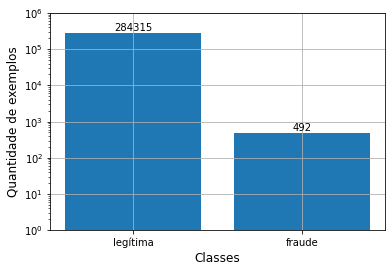

In [2]:
fig, ax = plt.subplots()
bars = ax.bar(['legítima','fraude'], card.Class.value_counts())
ax.bar_label(bars)
plt.yscale('log')
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Quantidade de exemplos', fontsize=12)
plt.ylim([1, 1000000])
plt.grid()
plt.show()

3. Após ter analisado a quantidade de exemplos em cada uma das duas classes no item anterior, o que você pode concluir sobre elas?

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

4. Treine um regressor softmax com o conjunto total de exemplos e imprima sua acurácia no conjunto total de dados.

**DICAS**

+ Para configurar o regressor softmax, durante o instanciamento da classe `LogisticRegression`, configure o parâmetro `multi_class` com a string `multinomial`, ou seja
```python 
multi_class='multinomial'
```
+ Configure o parâmetro `random_state` da classe `LogisticRegression` com a semente definida no item 1, ou seja,
```python 
random_state=seed
``` 
+ O treinamento irá levar um certo tempo, portanto, pegue um café e tenha paciência.

In [11]:
# Digite aqui o código do exercício.

5. Baseado no valor da acurácia obtida no item anterior, responda:

+ Qual foi a acurácia obtida pelo classificador?
+ Você diria que este é um bom classificador, ou seja, um classificador que praticamente acerta todas as predições (i.e., classificações)?
+ O que pode ser feito para nos certificarmos que este é realmente um bom classificador?
+ Observe a expressão para o calculo da acurácia mostrada abaixo:
$$Accuracy = \frac{TN + TP}{TN + TP + FP + FN},$$
onde $TN$, $TP$, $FP$ e $FN$ são os números de verdadeiros negativos, verdadeiros positivos, falsos positivos e falsos negativos, respectivamente.
+ Na equação da acurácia mostrada acima, o que aconteceria se $TN$ fosse praticamente 100 vezes ou mais maior que $TP$, $FP$ e $FN$? Essa situação afetaria o cálculo da acurácia? (**Justique sua resposta**).

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

6. Plote a matriz de confusão deste classificador para o conjunto total de exemplos.

In [12]:
# Digite aqui o código do exercício.

7. O objetivo principal deste classificador é **detectar fraudes**, pois elas causam muitos prejuízos às administradoras de cartão de crédito. Neste contexto, a **classe positiva** é a classe das `fraudes` e a **classe negativa** é a classe das transações `legítimas`. Sendo assim, responda:

+ O que é mais prejudicial (ou seja, mais caro) para a administradora de cartão de crédito usando este classificador, a classificação de uma fraude como sendo uma transação legítima ou a classificação de uma transação legítima como sendo uma fraude?
+ A classificação de uma fraude como sendo uma transação legítima é um falso negativo ($FN$) ou um falso positivo ($FP$)?
+ A classificação de uma transação legítima como sendo uma fraude é um falso negativo ($FN$) ou um falso positivo ($FP$)?

**DICAS**

+ Notem que a classificação de uma fraude como sendo uma transação legítima permitiria que transações fraudulentas não fossem bloqueadas ou canceladas, causando prejuízo à administradora de cartão de crédito, enquanto a classificação de uma transação legítima como sendo uma fraude pode fazer com que um e-mail seja enviado ao cliente solicitando que ele verifique a atividade do cartão ou que um analista averigue a transação com mais detalhes.

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

8. A acurácia atingida pelo classificador treinado no item anterior é altíssima, parecendo à primeira vista que ele é um classificador quase perfeito. Entretanto, no caso de uma base de dados desbalanceada (ou seja, com classes desbalanceadas), como a deste exercício, a acurácia não é uma métrica útil para esta tarefa. Por exemplo, o classificador pode atingir mais de 99.82% de acurácia nesta tarefa predizendo a classe `legítima` (classe negativa) o tempo todo, ou seja, se ele sempre predizer a classe `legítima`, ainda sim terá uma alta acurácia devido ao desbalanceamente das classes (veja a figura abaixo). Portanto, precisamos de outra métrica para mensurar a qualidade deste classificador.

Sendo assim e baseado em suas respostas para o item anterior, responda:

+ Qual é a métrica mais indicada para mensurar a qualidade deste classificador quando as classes são desbalanceadas? Apresenta a equação usada para calcular esta métrica.

<img src="../figures/desbalanced_classes.png" width="300px">

**DICAS**

+ Reveja o material de aula onde falamos sobre as métricas utilizadas para mensurar o desempenho de classificadores.

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

9. Calcule e imprima o valor da métrica mais indicada para mensurar a qualidade do classificador usado neste exercício.

In [13]:
# Digite aqui o código do exercício.

10. Após analisar o valor da métrica acima, responda:

+ Qual o valor obtido após o cálculo da métrica?
+ O que você pode concluir a respeito deste classificador, ou seja, ele é bom ou ruim para esta tarefa de detecção de fraudes?

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

11. Será que existe uma forma simples de melhorarmos o desempenho deste classificador? Leia o enunciado abaixo e na sequência, treine um novo classificador com as instruções listadas abaixo.

O objetivo do classificador treinado neste exercício é o de identificar transações fraudulentas, mas nós não temos muitos desses exemplos positivos (i.e., fraudes) para trabalhar, então nós gostariamos que o classificador **ponderasse fortemente** (ou seja, atribuísse um peso maior) os poucos exemplos positivos disponíveis. 

Isso pode ser feito configurando-se o parâmetro `class_weight` da classe `LogisticRegression` com a string `'balanced'`.  Isso fará com que o modelo **preste mais atenção** aos exemplos de uma classe sub-representada, ou seja, com poucos exemplos.

O modo `balanced` usa os valores de `y` para calcular automaticamente os pesos de cada classe. Os pesos são inversamente proporcionais às frequências de cada classe nos valores de `y`. O peso de cada classe é calculado através da seguinte equação: `n_samples / (n_classes * np.bincount(y))`, onde `n_samples` é o número total de exemplos, `n_classes` é o número de classes e `np.bincount(y)` retorna o número de exemplos de cada uma das classes.

Portanto, de posse destas informações, treine um novo regressor softmax que use os pesos das classes para melhorar seu desempenho e imprima seus valores de acurácia e da métrica mais indicada para mensurar a qualidade deste classificador quando as classes são desbalanceadas (esta é a métrica que você usou no item 9).

**DICAS**

+ Para configurar o regressor softmax, durante o instanciamento da classe `LogisticRegression`, configure o parâmetro `multi_class` com a string `multinomial`, ou seja
```python 
multi_class='multinomial'
```
+ Configure o parâmetro `random_state` da classe `LogisticRegression` com a semente definida no item 1, ou seja,
```python 
random_state=seed
``` 
+ Configure o parâmetro `class_weight` da classe `LogisticRegression` com a string `'balanced'`.
```python 
class_weight='balanced'
```
+ O treinamento irá levar um certo tempo, portanto, pegue um café e tenha paciência.

In [14]:
# Digite aqui o código do exercício.

12. Plote a matriz de confusão deste novo classificador.

In [15]:
# Digite aqui o código do exercício.

13. Observe os resultados das duas métricas impressas no item 11, da matriz de confusão e responda:

+ Comparando com os valores obtidos com o primeiro modelo de classificação, houve aumento ou diminuição dos valores das duas métricas?
+ A acurácia teve seu valor diminuído? Se sim, explique o motivo.
+ A segunda métrica, a que você definiu no item 8 e usou no item 9, teve seu valor aumentado? Se sim, explique o motivo deste aumento.
+ Observe a quantidade de falsos positivos ($FP$), ou seja, a quantidade transações legítimas que são classificadas como sendo fraudes, na matriz de confusão. Você acredita que um valor muito alto de falsos positivos causaria algum tipo de prejuízo às administradoras de cartão de crédito, aos clientes ou a ambos? Veja a dica abaixo. (**Justifique sua resposta.**)

**DICAS**

+ Normalmente, quando uma transação é classificada como fraudulenta, mesmo não sendo, a administradora de cartão de crédito envia algum tipo de mensagem (email, sms, whatsapp, etc.) solicitando ao cliente que informe se aquela transação é legítima ou não.

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**